In [1]:
import pandas as pd 

data = pd.read_csv('../Dataset/motivation.csv')
data

,motivation,year,title,num_ref,num_ref_3years,arxiv,neurips,iclr,icml,aaai,...,atr37,atr38,atr39,citation_count,citedIn2018,citedIn2019,citedIn2020,citedIn2021,citedIn2022,citedIn2023
0,1,2018,A PAC-Bayesian Approach to Spectrally-Normaliz...,19,7,6,1,4,0,0,...,1,59,108,444,65.0,107.0,96.0,83.0,84.0,32.0
1,1,2019,Unsupervised Speech Recognition via Segmental ...,42,10,6,2,1,1,0,...,8,42,161,31,0.0,6.0,6.0,6.0,14.0,0.0
2,1,2017,Unsupervised Cross-Domain Image Generation,27,15,6,1,3,2,0,...,6,45,154,16,162.0,197.0,164.0,118.0,87.0,18.0
3,1,2017,Entropy-SGD: Biasing Gradient Descent Into Wid...,62,31,0,2,6,4,0,...,3,65,209,561,94.0,116.0,119.0,91.0,95.0,39.0
4,1,2019,TimbreTron: A WaveNet(CycleGAN(CQT(Audio))) Pi...,42,20,14,0,1,0,0,...,1,48,182,87,0.0,9.0,20.0,16.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,1,2020,Neural Module Networks for Reasoning over Text,29,13,2,2,0,1,0,...,1,77,215,94,0.0,0.0,26.0,31.0,39.0,8.0
2108,1,2018,NerveNet: Learning Structured Policy with Grap...,54,27,18,1,7,4,0,...,2,65,276,190,14.0,44.0,42.0,44.0,50.0,11.0
2109,1,2017,Deep Variational Bayes Filters: Unsupervised L...,24,8,7,0,1,2,0,...,2,44,123,304,45.0,47.0,59.0,67.0,64.0,12.0
2110,1,2019,Subgradient Descent Learns Orthogonal Dictiona...,44,19,7,0,1,1,0,...,0,135,304,47,4.0,16.0,13.0,10.0,4.0,2.0


In [2]:
label_counts = data.groupby(['title', 'motivation']).size().unstack(fill_value=0)
dominant_labels = label_counts.idxmax(axis=1)
data = data.merge(dominant_labels.rename('dominant_label'), left_on='title', right_index=True)
df_filtered = data[data['motivation'] == data['dominant_label']]

label_counts_0 = data[data['motivation'] == 0].groupby('title').size().rename('count_0')
label_counts_1 = data[data['motivation'] == 1].groupby('title').size().rename('count_1')

df_filtered = df_filtered.merge(label_counts_0, left_on='title', right_index=True, how='left')
df_filtered = df_filtered.merge(label_counts_1, left_on='title', right_index=True, how='left')

df_filtered = df_filtered[df_filtered['count_0'] != df_filtered['count_1']]
df_filtered = df_filtered.drop(['dominant_label', 'count_0', 'count_1'], axis=1)

In [3]:
data = df_filtered.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 2110
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   motivation      1221 non-null   int64  
 1   year            1221 non-null   int64  
 2   title           1221 non-null   object 
 3   num_ref         1221 non-null   int64  
 4   num_ref_3years  1221 non-null   int64  
 5   arxiv           1221 non-null   int64  
 6   neurips         1221 non-null   int64  
 7   iclr            1221 non-null   int64  
 8   icml            1221 non-null   int64  
 9   aaai            1221 non-null   int64  
 10  iccv            1221 non-null   int64  
 11  cvpr            1221 non-null   int64  
 12  emnlp           1221 non-null   int64  
 13  acl             1221 non-null   int64  
 14  naacl           1221 non-null   int64  
 15  eccv            1221 non-null   int64  
 16  icra            1221 non-null   int64  
 17  icassp          1221 non-null   i

<Axes: xlabel='motivation', ylabel='count'>

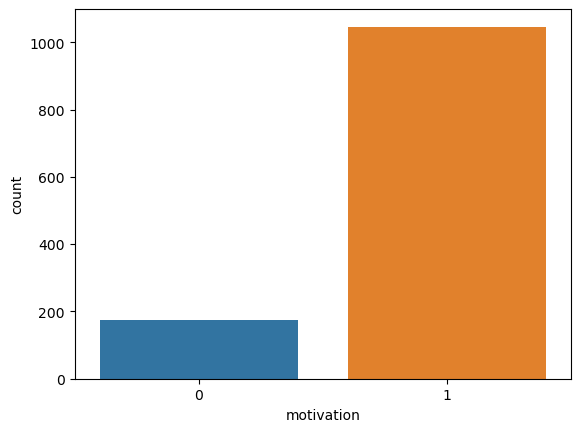

In [4]:
import seaborn as sns

sns.countplot(x=data['motivation'])

In [5]:
import plotly.graph_objects as go
import numpy as np

def correlation_matrix(dataframe):
    df_corr = dataframe.corr()
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            x = df_corr.columns,
            y = df_corr.index,
            z = np.array(df_corr),
            text=df_corr.values,
            texttemplate='%{text:.2f}'
        )
    )
    fig.show()

## Citing Sentence Predictor

In [6]:
citing_sentence = data[['atr0', 'atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9', 'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17', 'atr18', 'atr19']]
y = data['motivation']

In [7]:
dataframe = citing_sentence.join([y])
correlation_matrix(dataframe)

In [8]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

def find_chi(features, y, k):
    chi_square = SelectKBest(score_func=chi2, k=k)
    fit = chi_square.fit(features, y)
    
    selected_feature_indices = chi_square.get_support(indices=True)
    feature_names = features.columns
    chi2_scores = fit.scores_
    feature_score_dict = dict(zip(feature_names, chi2_scores))
    sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)
    selected_feature_names = [feature[0] for feature in sorted_features[:k]]
    
    print("Selected Feature Names:", selected_feature_names)
    x_chi = chi_square.fit_transform(features, y)
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x_chi)
    
    x_res, y_res = oversampling(x, y)
    x_train, x_test, y_train, y_test = train_split(x_res, y_res)
    return x_train, x_test, y_train, y_test, selected_feature_names

In [9]:
from imblearn.over_sampling import SMOTE

def oversampling(x, y):
    sm = SMOTE(random_state=123)
    x_res, y_res = sm.fit_resample(x, y)
    return x_res, y_res

In [10]:
from sklearn.model_selection import train_test_split

def train_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [11]:
test = pd.DataFrame(columns=['Features', 'Accuracy'])

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def model(features, y, i):
    model = XGBClassifier()
    x_train, x_test, y_train, y_test, selected_feature_names = find_chi(features, y, i)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    new_data = pd.DataFrame({'Features': [selected_feature_names], 'Accuracy': ["%.2f%%" % (accuracy * 100.0)]})
    global test
    test = pd.concat([test, new_data], ignore_index=True)
    return accuracy

In [13]:
for i in dict(enumerate(citing_sentence)):
    accuracy = model(citing_sentence, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr11']
Accuracy: 57.04%
Selected Feature Names: ['atr11', 'atr9']
Accuracy: 64.44%
Selected Feature Names: ['atr11', 'atr9', 'atr2']
Accuracy: 85.68%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10']
Accuracy: 86.87%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8']
Accuracy: 88.78%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1']
Accuracy: 88.78%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1', 'atr3']
Accuracy: 90.69%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1', 'atr3', 'atr14']
Accuracy: 91.89%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1', 'atr3', 'atr14', 'atr18']
Accuracy: 91.65%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1', 'atr3', 'atr14', 'atr18', 'atr0']
Accuracy: 91.41%
Selected Feature Names: ['atr11', 'atr9', 'atr2', 'atr10', 'atr8', 'atr1', 'atr3', 'atr14', 'atr18', 'atr0', 'atr4']
A

## Regular Sentences Predictor

In [14]:
regular_sentences = data[['atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25', 'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33', 'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39']]

In [15]:
dataframe = regular_sentences.join([y])
correlation_matrix(dataframe)

In [16]:
for i in dict(enumerate(regular_sentences)):
    accuracy = model(regular_sentences, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr22']
Accuracy: 61.34%
Selected Feature Names: ['atr22', 'atr25']
Accuracy: 83.29%
Selected Feature Names: ['atr22', 'atr25', 'atr32']
Accuracy: 87.83%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34']
Accuracy: 86.63%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39']
Accuracy: 90.45%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27']
Accuracy: 88.78%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27', 'atr20']
Accuracy: 89.98%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27', 'atr20', 'atr31']
Accuracy: 90.45%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27', 'atr20', 'atr31', 'atr35']
Accuracy: 91.89%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27', 'atr20', 'atr31', 'atr35', 'atr36']
Accuracy: 92.12%
Selected Feature Names: ['atr22', 'atr25', 'atr32', 'atr34', 'atr39', 'atr27', 'atr20

## Reference-Based Predictor

In [17]:
reference_based = data[['num_ref', 'num_ref_3years', 'arxiv', 'neurips', 'iclr', 'icml', 'aaai', 'iccv', 'cvpr', 'emnlp', 'acl', 'naacl', 'eccv', 'icra', 'icassp', 'ijcai', 'aistats', 'sigkdd', 'neuralcom', 'ieee_tran', 'acm_tran', 'mit_press', 'nature', 'jmlr']]

In [18]:
dataframe = reference_based.join([y])
correlation_matrix(dataframe)

In [19]:
for i in dict(enumerate(reference_based)):
    accuracy = model(reference_based, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['arxiv']
Accuracy: 54.42%
Selected Feature Names: ['arxiv', 'num_ref']
Accuracy: 87.59%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats']
Accuracy: 87.59%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd']
Accuracy: 87.83%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv']
Accuracy: 87.59%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv', 'cvpr']
Accuracy: 89.26%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv', 'cvpr', 'nature']
Accuracy: 89.26%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv', 'cvpr', 'nature', 'aaai']
Accuracy: 90.69%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv', 'cvpr', 'nature', 'aaai', 'ijcai']
Accuracy: 91.17%
Selected Feature Names: ['arxiv', 'num_ref', 'aistats', 'sigkdd', 'iccv', 'cvpr', 'nature', 'aaai', 'ijcai', 'acm_tran']
Accuracy: 89.98%
Selected Feature Names: ['arxiv', 'num_ref', 'aista

## Combination Predictor

In [20]:
combination = citing_sentence.join([regular_sentences, reference_based])

In [21]:
for i in dict(enumerate(combination)):
    accuracy = model(combination, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr11']
Accuracy: 57.04%
Selected Feature Names: ['atr11', 'atr22']
Accuracy: 83.29%
Selected Feature Names: ['atr11', 'atr22', 'arxiv']
Accuracy: 86.87%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25']
Accuracy: 88.07%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32']
Accuracy: 88.78%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref']
Accuracy: 88.31%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref', 'atr34']
Accuracy: 88.31%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref', 'atr34', 'atr39']
Accuracy: 89.50%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref', 'atr34', 'atr39', 'atr9']
Accuracy: 89.50%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref', 'atr34', 'atr39', 'atr9', 'atr2']
Accuracy: 89.50%
Selected Feature Names: ['atr11', 'atr22', 'arxiv', 'atr25', 'atr32', 'num_ref

In [22]:
test.to_excel('motivation.xlsx', index=False)